In [2]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [3]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [4]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [5]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,5.,size=N)
sigma

array([0.80008262, 1.97669977, 2.44444427, 3.73555826, 3.82900989,
       2.61610689, 4.09961094, 2.96081633, 1.91852904, 0.95760103,
       3.40235008, 0.75144646, 2.08902524, 4.86563844, 1.19821817,
       3.49648653, 1.06526313, 1.42887943, 1.6218687 , 3.53265014])

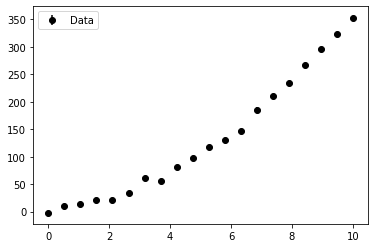

In [6]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [7]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [8]:
# Grado polinomial
n = 1
param = GetFit(x,y,n)
param

array([-45.46163845,  35.6566259 ])

In [9]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [10]:
X = sym.Symbol('x',real=True)
#GetModel(X,param)

In [11]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

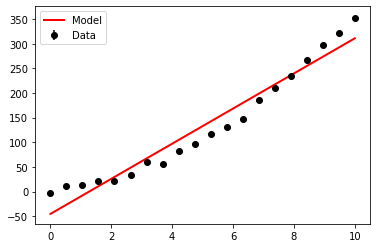

In [12]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()

In [13]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    #print(sigma2)
    
    return Cov,sigma2

In [14]:
Cov,_ = GetError(x,y,param)
Cov

array([[127.2078106 , -18.59191095],
       [-18.59191095,   3.7183822 ]])

132.8214907 25.471020776929453 5.214612004097768 2.10092204024096
35.65662590093289 1.928310710775098 18.491120596742658 2.1098155778331806
2.9565874017738634 0.15546548696321985 19.017644748852426 2.1199052992210112
-0.030500372881501866 0.06024985344997318 0.5062314866346856 2.131449545559323
-0.03440436184878296 0.02223531885267976 1.5472843936589922 2.1447866879169273
-0.003772828266185522 0.008930790724960643 0.42245176069805945 2.1603686564610127
-0.0030293341996278033 0.0035817968539844755 0.8457582389849665 2.1788128296634177
0.0021349465796135533 0.0013768049863846945 1.5506528526016143 2.200985160082949
-0.00012067764029490527 0.0005939478306069457 0.2031788552398394 2.2281388519649385
-5.5806786085534774e-05 0.0002640738309436267 0.21133024005490403 2.2621571627409915


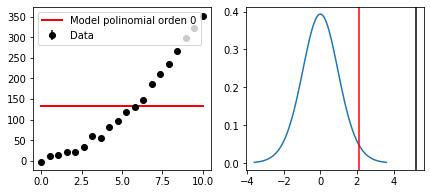

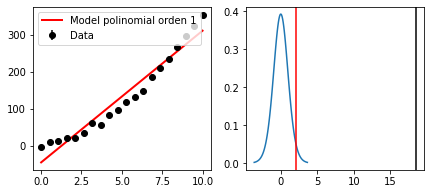

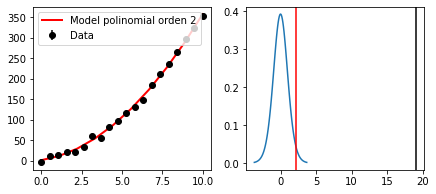

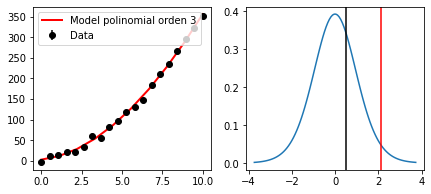

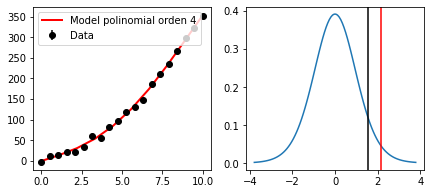

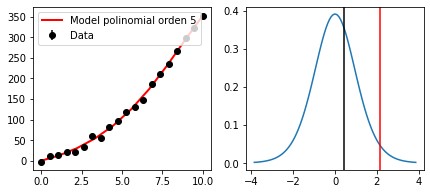

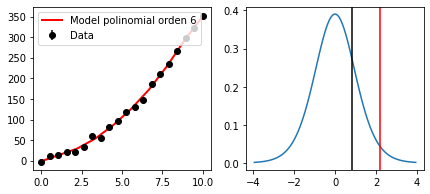

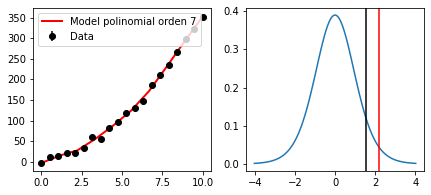

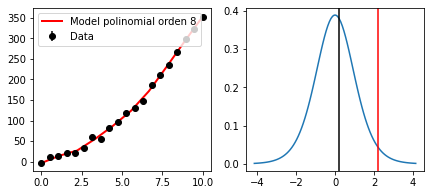

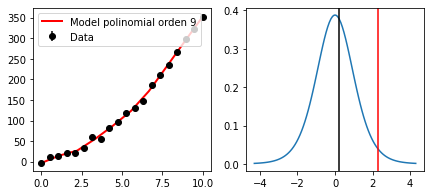

In [15]:
for n in range(10):
    
    param = GetFit(x,y,n)
    Cov,_ = GetError(x,y,param)
    
    _x = np.linspace(np.min(x),np.max(x),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = N - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')
    
    #print(param,Cov)

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
X = x.reshape(-1,1) 
X.shape

(20, 1)

In [62]:
model = LinearRegression() 

In [63]:
reg = model.fit(X,y)

In [64]:
print(reg.intercept_,reg.coef_)

-5.129185528852986 [2.12503681]


In [65]:
param = GetFit(x,y,1)
param

array([-5.12918553,  2.12503681])

In [66]:
reg.score(X,y)

0.9931735511758472

In [68]:
Ypredict = model.predict(X)
#Ypredict

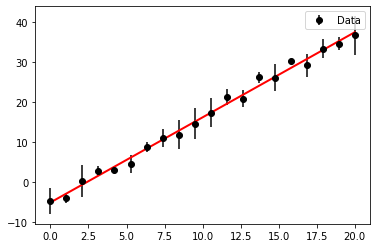

In [70]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(X,Ypredict,color='r',lw=2)
plt.legend(loc=0)